In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read Height-Weight Data.csv dataset
df = pd.read_csv('/content/Height-Weight Data.csv')
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [3]:
df.shape  # dataset shape

(3501, 2)

In [4]:
# prints information about the Datasets. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [5]:
# returns description of the data in the Datasets.
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


Text(0.5, 1.0, 'Height vs Weight')

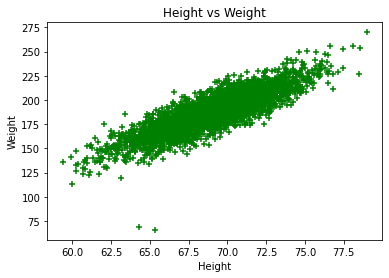

In [6]:
# ploting scatter plot of height vs weight
plt.scatter(df.Height, df.Weight, color='green', marker='+')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')

Text(0.5, 1.0, 'Height vs Weight')

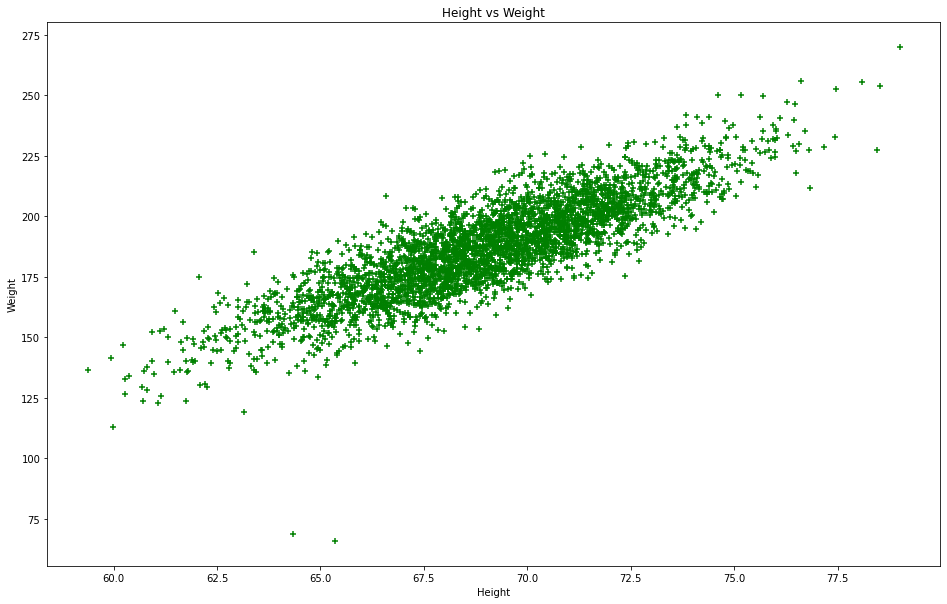

In [7]:
plt.figure(figsize=(16,10)) # define figure size
plt.scatter(df.Height, df.Weight, color='green', marker='+')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')

In [8]:
# mean of height
df.Height.mean()

69.02441087268797

In [9]:
# mean of weight
df.Weight.mean()

186.89125797946284

In [10]:
x = df.drop('Weight', axis=1) # independent variable
y = df['Weight'] # dependent variable

In [11]:
# see first 5 rows of dataset
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [12]:
# spliting datasets into train & test size
from sklearn.model_selection import train_test_split as tts 
xtrain , xtest , ytrain, ytest = tts(x,y,train_size=.80,random_state=1) #train_size=.80 , test_size=.20

In [13]:
xtrain.shape   # independent train sets shape

(2800, 1)

In [14]:
xtest.shape   # independent test sets shape

(701, 1)

In [15]:
xtrain.head()  # independent train sets

,Height
3246,69.575891
2118,63.992899
2583,67.174715
432,68.921041
1724,67.140186


In [16]:
ytrain.head()  # dependent train sets

3246    206.600442
2118    154.963174
2583    178.674938
432     188.328807
1724    188.848499
Name: Weight, dtype: float64

In [17]:
from sklearn.linear_model import LinearRegression   # import LinearRegression algo
lr = LinearRegression()   # creating object for linear model
lr.fit(xtrain ,ytrain)    # train the ML model ; xtrain=x ; ytrain=y

LinearRegression()

In [18]:
# find slope/coefficient value(M)
lr.coef_

array([5.97800913])

In [19]:
# find y-intercept value(C)
lr.intercept_

-225.8511972451222

In [20]:
m = lr.coef_   # models slope value store in m var
c = lr.intercept_   #  models y-intercept value store in c var

In [21]:
df.head(10)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [22]:
# model prediction way-1
x = 71.730978
y = (m * x) + c
y

array([202.95724409])

In [23]:
# model prediction way-2
lr.predict([[71.730978]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([202.95724409])

In [24]:
# predict weight of whole dataset
lr.predict(df[['Height']])

array([215.60694467, 185.32765309, 217.17968935, ..., 215.99869634,
       177.04283025, 208.98302947])

In [25]:
# add predicted weight column in given dataset
df['Predicted Weight'] = lr.predict(df[['Height']]) # y=mx+c

In [26]:
df.head(20)

,Height,Weight,Predicted Weight
0,73.847017,241.893563,215.606945
1,68.781904,162.310473,185.327653
2,74.110105,212.740856,217.179689
3,71.730978,220.042470,202.957246
4,69.881796,206.349801,191.902816
5,67.253016,152.212156,176.187945
6,68.785081,183.927889,185.346646
7,68.348516,167.971111,182.736852
8,67.018950,175.929440,174.788696
9,63.456494,156.399676,153.492303


In [27]:
testing = lr.predict(xtest) # ytest

In [28]:
testing

array([177.08348257, 189.97931446, 167.56105707, 178.78547886,
       163.18509437, 180.25519153, 187.5746301 , 177.29406308,
       187.61410451, 214.82687791, 146.54705769, 205.53609201,
       178.63524049, 182.16876965, 221.10928254, 196.04746384,
       174.66519041, 180.50000529, 174.52687291, 219.61734596,
       209.17973484, 180.29820038, 166.30726829, 190.45561742,
       162.41180308, 186.69252404, 190.41647904, 179.34185839,
       161.77205047, 181.25788043, 147.18573982, 201.08593379,
       189.09154018, 206.86396518, 194.06129799, 163.9082029 ,
       219.63585423, 178.135123  , 190.46824322, 161.75211608,
       192.0001994 , 180.53363931, 191.18625621, 183.69534066,
       193.07163212, 214.25906472, 176.83242358, 197.31231182,
       190.08986292, 185.13039464, 181.43816242, 201.55338182,
       173.80328673, 177.33236514, 159.2015133 , 161.11684495,
       195.53300295, 141.6637074 , 137.1399713 , 181.00515179,
       177.46765825, 190.22587781, 205.84453492, 171.14

In [29]:
ytest

719     192.672676
2296    187.491501
3083    191.563495
1296    177.909685
2234    165.313807
           ...    
1263    193.509269
1144    193.367198
3063    181.674739
1854    220.866365
1409    201.438831
Name: Weight, Length: 701, dtype: float64

In [30]:
xtest['pred'] = lr.predict(xtest)

In [31]:
xtest.head()

,Height,pred
719,67.402821,177.083483
2296,69.560033,189.979314
3083,65.809912,167.561057
1296,67.687531,178.785479
2234,65.077902,163.185094


In [32]:
xtest = xtest[['Height']]

In [33]:
from sklearn.metrics import mean_squared_error # mse
pred = lr.predict(xtest)
mse = mean_squared_error(ytest , pred) #testing error
mse

106.01679593408504

In [34]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, pred) # mae

8.336615810349368

In [35]:
lr.predict([[90]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([312.16962439])

In [36]:
lr.predict([[110]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([431.72980698])

Text(0.5, 1.0, 'Height vs Weight')

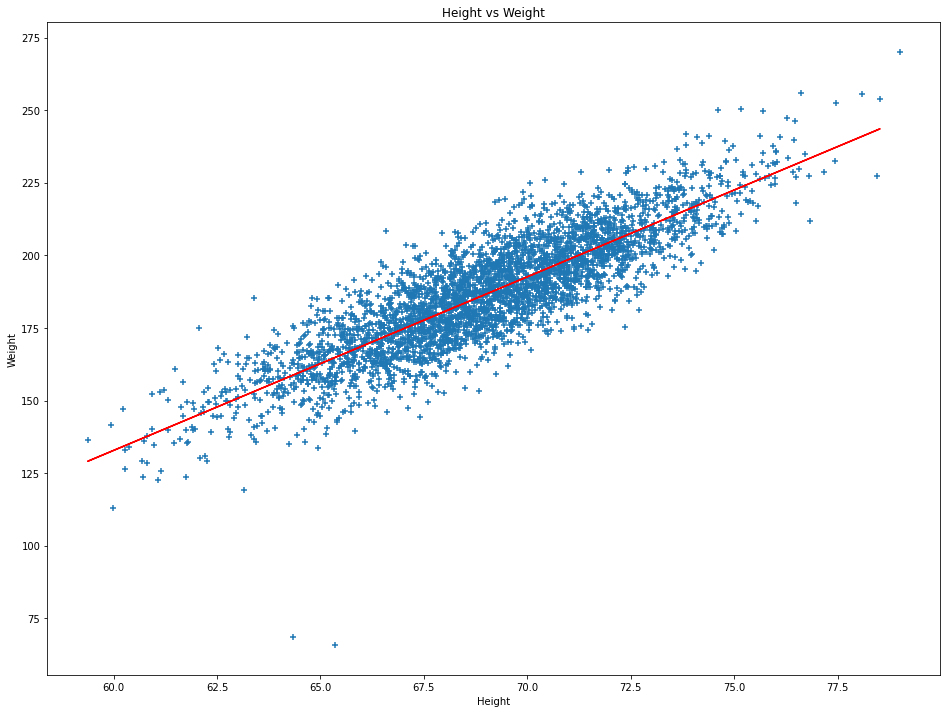

In [37]:
plt.figure(figsize=(16,12))
plt.scatter(df['Height'] , df['Weight'],marker='+') 
plt.plot(xtest , lr.predict(xtest), color='red')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')

Text(0.5, 1.0, 'Height vs Weight')

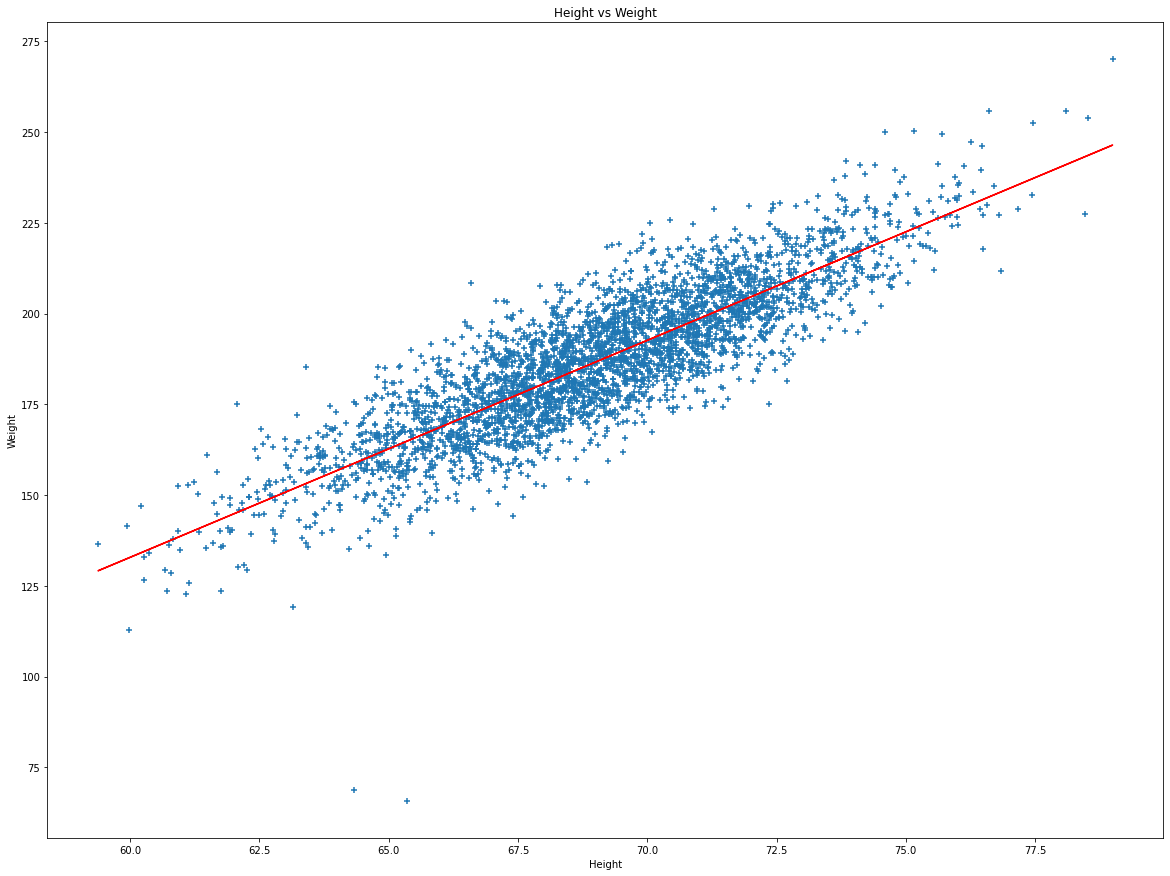

In [38]:
plt.figure(figsize=(20,15)) 
plt.scatter(df['Height'] , df['Weight'],marker='+') 
plt.plot(df[['Height']] , lr.predict(df[['Height']]), color='red')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')

In [39]:
lr.score(xtest, ytest) # R Squared Value

0.7437517146778504

In [40]:
lr.score(df[['Height']], df.Weight) # R Squared Value

0.7323178174877905

In [41]:
lr.score(xtrain, ytrain) # R Squared Value

0.729271763964062